In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## Tratamentos dos dados
### carregando dados

In [17]:
df=pd.read_csv(R'C:\Users\Anderson Salata\Desktop\CURRICULO\despesas gabinetes\Ano.csv',  sep = ';')

In [18]:
df.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

In [13]:
df.shape

(107963, 31)

In [19]:
Total = df['vlrDocumento'].sum()
print ("vlrDocumento:",Total)

vlrDocumento: 107138601.93


In [20]:
print(df['txNomeParlamentar'].mode())

0    Delegado Antônio Furtado
dtype: object


In [21]:
df.dtypes

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

In [25]:
df.sample(3).T
#conferindo a importação dos dados.

,18240,63261,31295
txNomeParlamentar,Benes Leocádio,Carlos Chiodini,Aureo Ribeiro
cpf,4.06654e+10,5.03191e+08,5.35553e+09
ideCadastro,109429,204361,160512
nuCarteiraParlamentar,120,473,290
nuLegislatura,2019,2019,2019
sgUF,RN,SC,RJ
sgPartido,REPUBLICANOS,MDB,SOLIDARIEDADE
codLegislatura,56,56,56
numSubCota,3,3,999
txtDescricao,COMBUSTÍVEIS E LUBRIFICANTES.,COMBUSTÍVEIS E LUBRIFICANTES.,PASSAGEM AÉREA - RPA


In [28]:
df.info()
#verificando os tipos de variáveis existentes no banco de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107962 entries, 0 to 107961
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          107962 non-null  object 
 1   cpf                        107500 non-null  float64
 2   ideCadastro                107500 non-null  float64
 3   nuCarteiraParlamentar      107500 non-null  float64
 4   nuLegislatura              107962 non-null  int64  
 5   sgUF                       107500 non-null  object 
 6   sgPartido                  107500 non-null  object 
 7   codLegislatura             107962 non-null  int64  
 8   numSubCota                 107962 non-null  int64  
 9   txtDescricao               107962 non-null  object 
 10  numEspecificacaoSubCota    107962 non-null  int64  
 11  txtDescricaoEspecificacao  32379 non-null   object 
 12  txtFornecedor              107962 non-null  object 
 13  txtCNPJCPF                 99

In [29]:
df.columns.values

array(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura',
       'numSubCota', 'txtDescricao', 'numEspecificacaoSubCota',
       'txtDescricaoEspecificacao', 'txtFornecedor', 'txtCNPJCPF',
       'txtNumero', 'indTipoDocumento', 'datEmissao', 'vlrDocumento',
       'vlrGlosa', 'vlrLiquido', 'numMes', 'numAno', 'numParcela',
       'txtPassageiro', 'txtTrecho', 'numLote', 'numRessarcimento',
       'vlrRestituicao', 'nuDeputadoId', 'ideDocumento', 'urlDocumento'],
      dtype=object)

In [30]:
df.corr().T

,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,codLegislatura,numSubCota,numEspecificacaoSubCota,indTipoDocumento,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
cpf,1.000000,-0.029954,-0.039547,NaN,NaN,0.024037,0.031057,0.014472,0.026903,-0.002826,0.020987,-0.011076,NaN,0.001364,-0.017767,NaN,0.097797,0.097609,-0.016903
ideCadastro,-0.029954,1.000000,0.018864,NaN,NaN,-0.010329,0.037939,0.018098,-0.003394,-0.008734,-0.008994,-0.006505,NaN,-0.005432,0.065494,NaN,0.086163,0.799723,0.060370
nuCarteiraParlamentar,-0.039547,0.018864,1.000000,NaN,NaN,-0.084421,0.032953,-0.050055,-0.079652,0.002438,-0.061830,0.026771,NaN,0.004649,0.113269,NaN,-0.196187,0.017803,0.112242
nuLegislatura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
codLegislatura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numSubCota,0.024037,-0.010329,-0.084421,NaN,NaN,1.000000,-0.283298,-0.283320,-0.020000,-0.027506,-0.145442,-0.146787,NaN,-0.002181,-0.712476,NaN,0.312883,-0.002737,-0.665236
numEspecificacaoSubCota,0.031057,0.037939,0.032953,NaN,NaN,-0.283298,1.000000,0.480263,-0.179904,-0.007417,-0.144905,0.085098,NaN,-0.003829,0.340403,NaN,-0.359479,0.048743,0.337667
indTipoDocumento,0.014472,0.018098,-0.050055,NaN,NaN,-0.283320,0.480263,1.000000,-0.071620,-0.014286,-0.035211,0.090522,NaN,-0.004218,0.315899,NaN,-0.414246,0.016541,0.309712
vlrDocumento,0.026903,-0.003394,-0.079652,NaN,NaN,-0.020000,-0.179904,-0.071620,1.000000,0.053859,0.972122,-0.024039,NaN,0.038699,0.095852,NaN,0.999077,0.001077,0.100001
vlrGlosa,-0.002826,-0.008734,0.002438,NaN,NaN,-0.027506,-0.007417,-0.014286,0.053859,1.000000,0.034552,-0.008660,NaN,-0.000445,0.039512,NaN,-0.018910,-0.006487,0.039231


#### Medidas Básicas do DataSet

In [31]:
pd.options.display.float_format = "{:.3f}".format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cpf,107500.000,32126667901.536,29275363108.508,1608657.000,5823529910.000,22275150668.000,51004224249.000,99898659149.000
ideCadastro,107500.000,167346.676,45812.485,62881.000,141531.000,178962.000,204453.000,217330.000
nuCarteiraParlamentar,107500.000,298.757,157.761,1.000,165.000,299.500,441.000,590.000
nuLegislatura,107962.000,2019.000,0.000,2019.000,2019.000,2019.000,2019.000,2019.000
codLegislatura,107962.000,56.000,0.000,56.000,56.000,56.000,56.000,56.000
numSubCota,107962.000,153.443,334.044,1.000,3.000,5.000,120.000,999.000
numEspecificacaoSubCota,107962.000,0.307,0.488,0.000,0.000,0.000,1.000,4.000
indTipoDocumento,107962.000,1.122,1.620,0.000,0.000,0.000,1.000,4.000
vlrDocumento,107962.000,992.373,2446.255,-2350.530,88.607,220.090,702.517,83750.000
vlrGlosa,107962.000,4.010,54.813,0.000,0.000,0.000,0.000,5410.000


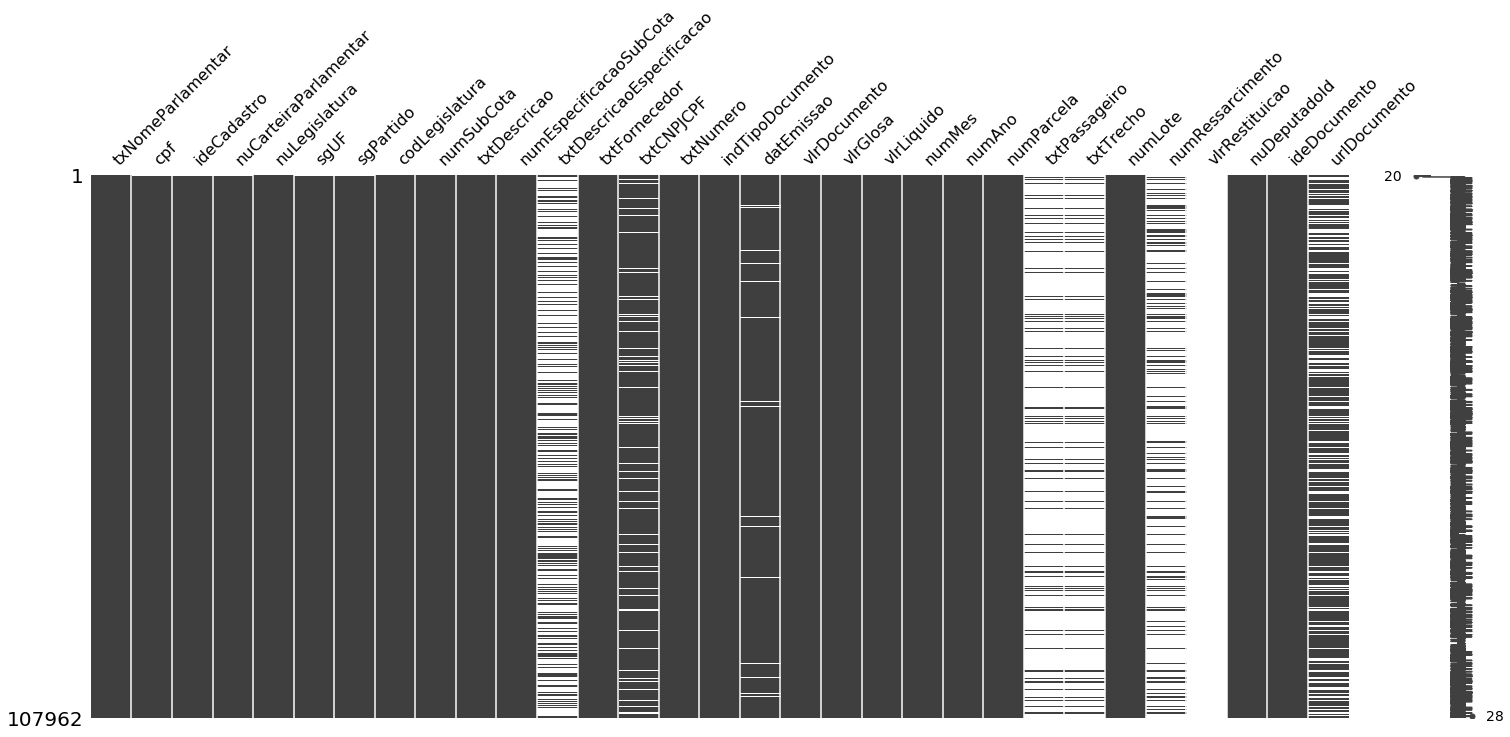

In [32]:
msno.matrix(df)
#usando a matrix para analisar dados em brancos e possíveis erros.

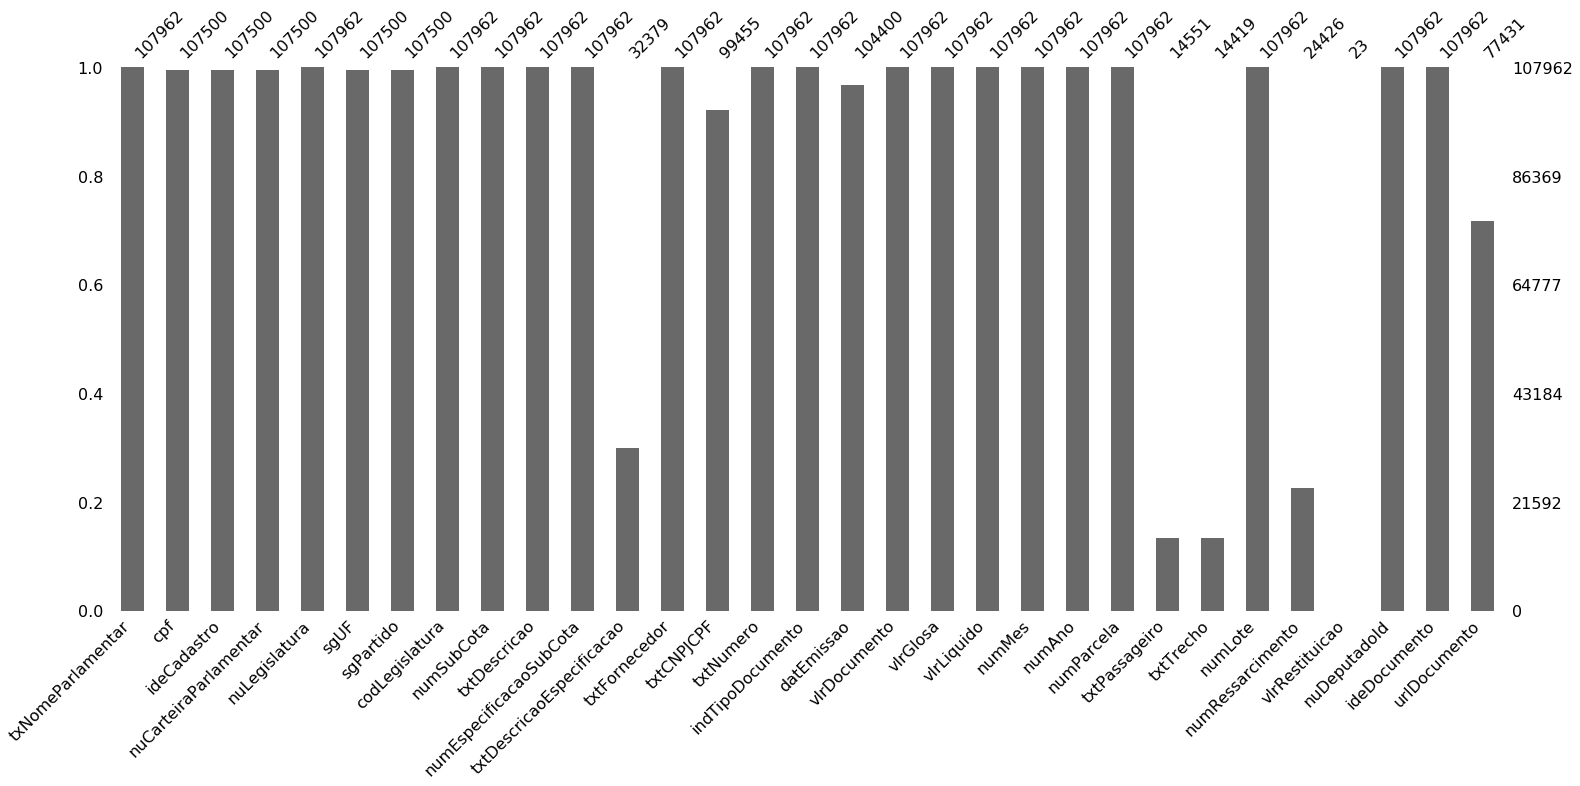

In [33]:
msno.bar(df)
#outra forma de visualização dos dados faltantes.

In [35]:
pd.to_numeric(df.txtDescricaoEspecificacao, errors='coerce')
df.isnull().sum()

txNomeParlamentar                 0
cpf                             462
ideCadastro                     462
nuCarteiraParlamentar           462
nuLegislatura                     0
sgUF                            462
sgPartido                       462
codLegislatura                    0
numSubCota                        0
txtDescricao                      0
numEspecificacaoSubCota           0
txtDescricaoEspecificacao     75583
txtFornecedor                     0
txtCNPJCPF                     8507
txtNumero                         0
indTipoDocumento                  0
datEmissao                     3562
vlrDocumento                      0
vlrGlosa                          0
vlrLiquido                        0
numMes                            0
numAno                            0
numParcela                        0
txtPassageiro                 93411
txtTrecho                     93543
numLote                           0
numRessarcimento              83536
vlrRestituicao              